In [1]:
from fastai.conv_learner import *
PATH= "data/asl-alphabet/"
sz=200; bs=64

In [2]:
os.listdir(PATH)


['test', 'train']

In [6]:
files = os.listdir(f'{PATH}train/A')[:5]
files


['A2773.jpg', 'A1713.jpg', 'A2509.jpg', 'A2392.jpg', 'A438.jpg']

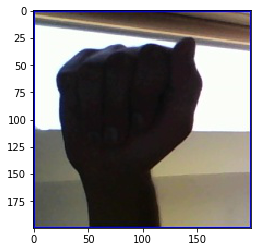

In [8]:
img = plt.imread(f'{PATH}train/A/{files[0]}')
plt.imshow(img)

In [9]:
img.shape

(200, 200, 3)

In [10]:
PATH_TRAIN=PATH + "train"

In [11]:
PATH_TRAIN


'data/asl-alphabet/train'

In [12]:
create_val(PATH_TRAIN,0.2)

In [13]:
tfms = tfms_from_model(resnet50,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH,bs=bs, tfms=tfms)
learn = ConvLearner.pretrained(resnet50, data)
%time learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                      
    0      0.425654   0.21484    0.938621  
    1      0.313397   0.134604   0.961724                      
    2      0.256994   0.103865   0.96977                       

CPU times: user 31min 46s, sys: 11min 3s, total: 42min 49s
Wall time: 46min 47s


[array([0.10387]), 0.9697701149699332]

In [ ]:
learn.save('asl_')